## 2 - Medidas de dispersão

Quantificam a **variabilidade** (ou dispersão) dos dados. Medidas de variabilidade indicam o quanto as observações variam ao redor da medida de centralidade. Em outras palavras, indicam o quão longe podemos esperar que uma observação esteja do valor típico para aquela variável. Existem diversas medidas de variabilidade, algumas das quais apresentamos a seguir.

<style>
  table {
    width: 50%;
    margin-left: auto;
    margin-right: auto;
    border-collapse: collapse;
  }
  
  th, td {    
    padding: 10px;
    text-align: left;
    border-bottom: 1px solid #ddd;
  }
  
  th {
    background-color: #000000;
  }
</style>


|                       |   Idade Segmento A    |   Idade Segmento B   |
|:---------------------:|:---------------------:|:--------------------:|
| **Conjunto de Dados** | [15, 20, 40, 55, 70]  | [30, 35, 40, 45, 50] |
| **Média**             |          40           |         40           |
| **Mediana**           |          40           |          40          |












### 2.1 Mínimo, Máximo e Amplitude

- Mínimo de um conjunto de dados é o número de menor valor.
- Máximo de um conjunto de dados é o número de maior valor.
- Amplitude de um conjunto de dados é a diferença entre o maior e menor valor observado. Esta medida de variabilidade é **fortemente** influenciada por valores extremos nas observações, como **outliers**.

In [1]:
# Importando as lib
# Obs: se tiver algum problema com a importação por nao ter o pacote instalado pode instalar usando a linha acima !pip install <pacote>
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# ler os dados
dados = pd.read_csv('../Database/marketing_data.csv')
print(f'Shape dos dados: {dados.shape}')
dados.head(3)

Shape dos dados: (120, 17)


,id_cliente,sucesso,idade,ocupacao,estado_civil,educacao_formal,produto_credito,produto_fin_imob,npl_90,tipo_contato,mes_contato,dia_semana_contato,num_contatos,dias_ult_contato,num_prev_conato,sucesso_prev,saldo
0,DNXO0711,nao,45,industria,casado,medio_completo,nao,sim,nd,email,jun,sex,3,999,0,nao_aplica,13000.42
1,DNXO0712,nao,46,ti,casado,ensino_superior,nao,sim,nao,whatsapp,ago,qua,1,999,0,nao_aplica,13000.43
2,DNXO0713,nao,47,industria,casado,ensino_superior,nao,sim,nao,whatsapp,ago,qua,1,999,0,nao_aplica,13000.44


In [2]:
# Define um array de amostra
amostra2 = np.array([2, 3, 4, 7, 7, 8, 8, 11, 11, 11, 12, 15, 19, 87])
print(f'Amostra: {amostra2}')
print(f"Amostra ordenados: {amostra2}")
print(f'\n- Mínimo: {np.min(amostra2)}')
print(f'- Máximo: {np.max(amostra2)}')
print(f'- Amplitude: {np.max(amostra2) - np.min(amostra2)}')

Amostra: [ 2  3  4  7  7  8  8 11 11 11 12 15 19 87]
Amostra ordenados: [ 2  3  4  7  7  8  8 11 11 11 12 15 19 87]

- Mínimo: 2
- Máximo: 87
- Amplitude: 85


In [3]:
# No dataset
print(f'\n- Mínimo Idade: {dados['idade'].min()}')
print(f'- Máximo Idade: {dados['idade'].max()}')
print(f'- Amplitude Idade: {dados['idade'].max() - dados['idade'].min()}')


- Mínimo Idade: 45
- Máximo Idade: 164
- Amplitude Idade: 119


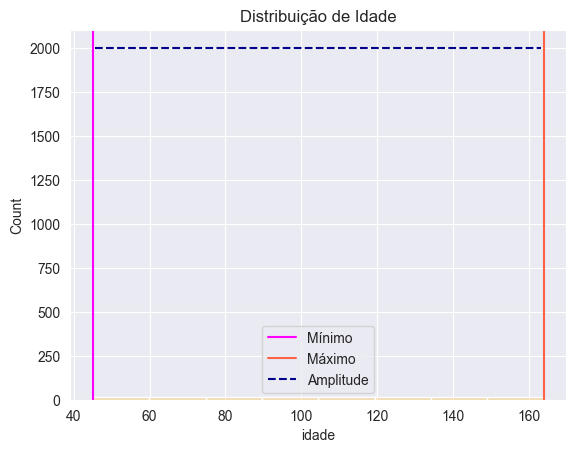

In [4]:
# na representação gráfica

# Plot do histograma
sns.histplot(dados['idade'], color="orange", alpha=0.3)

# plotando a mediana
plt.axvline(dados['idade'].min(), color='magenta', label='Mínimo')
plt.axvline(dados['idade'].max(), color='tomato', label='Máximo')
plt.axhline(y=2000, xmin=0.05, xmax=0.95, color='darkblue', label='Amplitude', ls='--')
plt.title('Distribuição de Idade')

# Crie uma legenda
plt.legend()
plt.show()

### 2.2 Intervalo Interquartil (IQR) e Diagrama de caixa (boxplot)

**Intervalo interquartil (IQR)**

Foi desenvolvido no âmbito da estatística a fim de avaliar o grau de espalhamento de dados (dispersão) em torno da medida de centralidade. Por construção, aproximadamente metade dos dados estão entre o 1º e 3º quartil, isto é, este também pode ser interpretado como um intervalo de valores tipicamente assumidos pelas observações.

<center> IQR = Q3 - Q1 </center>





<center><img src="https://cdn.scribbr.com/wp-content/uploads/2020/09/iqr_quartiles.png" width=700></center>

In [5]:
# Define a semente randômica
np.random.seed(42)

# Cria uma amostra de números aleatórios
amostra = np.random.randint(1, 20, 13)

In [6]:
# Print da amostra
print(f'Amostra: {amostra}')

# Print da amostra ordenada
print(f'Dados ordenados: {sorted(amostra)}')

# Calcula p intervalo interquartil
iqr = np.quantile(amostra, 0.75) - np.quantile(amostra, 0.25)

# Print do IQR
print(f'- IQR: {iqr}')

Amostra: [ 7 15 11  8  7 19 11 11  4  8  3  2 12]
Dados ordenados: [2, 3, 4, 7, 7, 8, 8, 11, 11, 11, 12, 15, 19]
- IQR: 4.0


In [7]:
# No nosso dataset
print("IQR Idade:", dados['idade'].quantile(q=0.75) - dados['idade'].quantile(q=0.25))

IQR Idade: 59.5


**Boxplot**

O boxplot é um gráfico utilizado para avaliar a distribuição empírica dos dados. O boxplot é formado pelo primeiro e terceiro quartil e pela mediana. As hastes conhecidas como bigodes (**whiskers**) se entendem a partir da caixa e mostram a extensão dos dados. O comprimento dos bigodes é calculado com base na amplitude dos dados, excluindo os valores atípicos. O ponto em cada bigode é chamado de "whiskers", indicando o limite inferior e superior dos dados e são calculados da forma abaixo:

- Limite inferior: $\quad\quad \max\{ \max(\text{dados}); \quad Q_1-1,5(Q_3-Q_1)\}$.

- Limite superior: $\quad\quad \min\{ \min(\text{dados}); \quad Q_3+1,5(Q_3-Q_1)\}$.

Para este caso, os pontos fora destes limites são considerados valores atípicos (outliers) e são denotadas por bolinhas (o). A figura a seguir apresenta um exemplo do formato de um boxplot.


<center><img src="https://analisemacro.com.br/wp-content/uploads/2023/06/boxplot.jpg" width=880></center>


Visualizando suas variáveis com este diagrama, você consegue visualizar algumas informações preciosas, tais como:

- a mdiana, representada pela linha central dentro da caixa (em verde, na figura acima);
- o primeiro e o terceiro quartil, assim como o IQR (representado pela caixa);
- os valores limites para identificação de outliers, representado pelas hastes da caixa, em ambos os lados; os outliers, que no caso da figura acima são os pontos laranjas;


Por conta disto, o gráfico de boxplot é uma ferramenta útil para visualizar a distribuição e a variação dos dados em variáveis numéricas contínuas, bem como para identificar valores atípicos. Ele fornece uma visão geral, rápida e concisa das estatísticas fundamentais de um conjunto de dados, permitindo comparar várias distribuições lado a lado.

O boxplot pode ainda ser utilizado para uma comparação visual entre dois ou mais grupos. por exemplo, duas ou mais caixas são colocadas lado a lado e se compara a variabilidade entre elas, a mediana e assim por diante. Outro ponto importante é a diferença entre os quartis $ (Q_3 - Q_1) $ que é uma medida da variabilidade dos dados.









### Outliers

**Outliers** ou **discrepantes** referem-se a observações **extremas**, que se deslocam muito das outras observações em um conjunto de dados, que **destoam do padrão da distribuição** dos dados.

A variação interquartil (IQR) pode ser usada para identificar matematicamente os outliers de um conjunto de dados:

- **Upper outliers:** Q3 + 1,5(IQR)
- **Lower outliers:** Q1 - 1,5(IQR)



Outliers podem existir por motivos diferentes, alguns dos quais são:

- erro na entrada de dados (erro humano);
- erro na medição/coleta dos dados (erro instrumental);
- erro experimentais (planejamento/execução dos experimentos);
- outliers naturais (não decorrente de erros);


No caso dos erros, é importante que os outliers sejam tratados (comumente são removidos). Por outro lado, outliers naturais são importante constituintes dos dados, de modo que não devem ser eliminados mas, muitas vezes, devem ser tratados.

De qualquer modo, antes de começarmos a pensar em como **tratar** os outliers, o primeiro passo é **identificá-los** e a melhor forma para isso é utilizar o boxplot.

Em resumo, o outlier:

   - É o dado que é muito diferente/distante da maioria dos outros
   - Não é errado ou inválido
   - Interfere na média
   - Deve ser investigado

Dados: [ 7 15 11  8  7 19 11 11  4  8  3  2 12]

q1: 7.0
q3: 11.0
média: 9.076923076923077
mediana: 8.0
IQR: 4.0


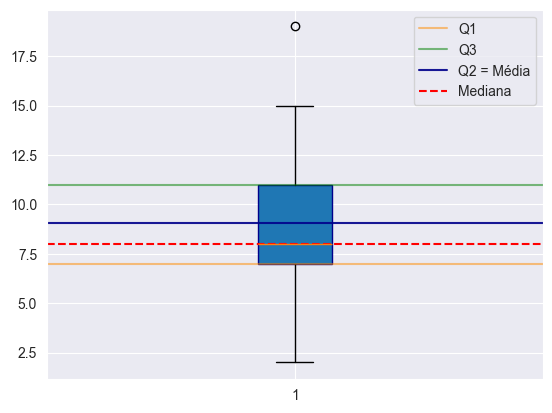

In [8]:
# print da amostra ordenada
print(f'Dados: {amostra}')
print(f'\nq1: {np.quantile(amostra, 0.25)}')
print(f'q3: {np.quantile(amostra, 0.75)}')
print(f'média: {np.mean(amostra)}')
print(f'mediana: {np.median(amostra)}')

# Calcula o intervalo interquartil
iqr = np.quantile(amostra, 0.75) - np.quantile(amostra, 0.25)

# print do IQR
print(f'IQR: {iqr}')

plt.boxplot(amostra, meanline=True, patch_artist=True, showfliers=True, boxprops=dict(color='darkblue'))
plt.axhline(np.quantile(amostra, 0.25), color='darkorange', label='Q1', alpha=0.5)
plt.axhline(np.quantile(amostra, 0.75), color='green', label='Q3', alpha=0.5)
plt.axhline(np.mean(amostra), color='darkblue', label='Q2 = Média', alpha=0.9)
plt.axhline(np.median(amostra), color='red', label='Mediana', ls='--')
plt.legend()
plt.show()

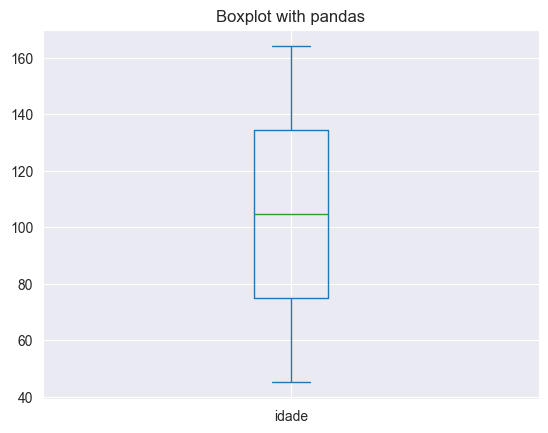

In [9]:
# Boxplot with Pandas
dados[['idade']].plot.box(title='Boxplot with pandas');

<Axes: xlabel='estado_civil', ylabel='idade'>

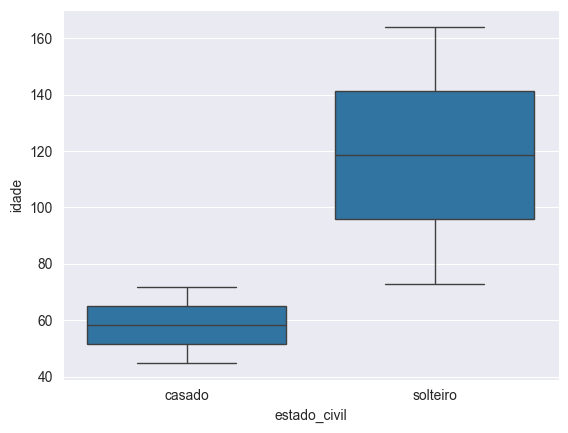

In [10]:
# podemos comparar as distribuição da idade em função do seu estado cívil
sns.boxplot(y="idade", x="estado_civil", data=dados)

### <p style = "color:Orange"> Prática </p>
Podemos comparar e ver a distribuição do *saldo* por grupos usando a variável ocupação. Os grupos são iguais? Que grupos possuem valores atípicos?

<Axes: xlabel='ocupacao', ylabel='saldo'>

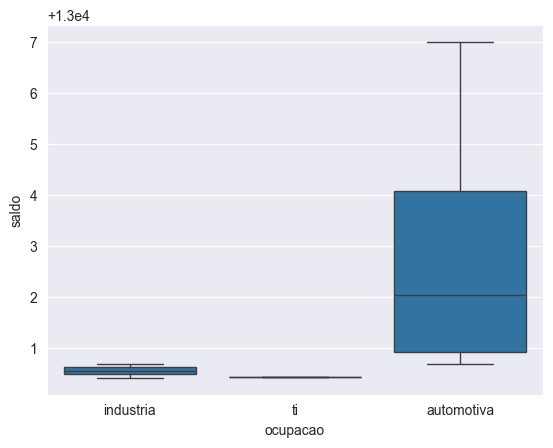

In [11]:
# Boxplot com a variável saldo por ocupação
sns.boxplot(y="saldo", x="ocupacao", data=dados)

### 2.3 Variância e Desvio Padrão

Mede o quanto os dados estão longe da média. A variância e o desvio padrão são índices da variabilidade estáveis, pois leva em consideração a totalidade dos valores da variável em estudo, evitando assim falhas e tornando-se métodos mais utilizados.


**Variância**


A variânca baseia-se nos desvios em torno da média aritmética, porém determinando a **média aritmética dos quadrados dos desvios**. Ela é representada por:

$$ s^2 =Var(X) = \sum_{i=1}^{n}\frac{(x-\overline{x})^{2}}{n}$$


**obs:** Quando nosso interesse não se restringe à descrição dos dados, mas, partindo da amostra, visamos tirar inferências válidas para a respectiva população, convém efetuar uma modificação, que consite em usar o divisior n-1 em lugar de n.

**Interpretação:**
A variância representa **o quanto os dados se afastam da média, em geral**

<style>
  table {
      width: 50%;
      margin-left: auto;
      margin-right: auto;
      border-collapse: collapse;
  }
  
  th, td {    
      padding: 10px;
      text-align: left;
      border-bottom: 1px solid #ddd;
  }
  
  th {
      background-color: #000000;
  }
</style>

|                           |          Variância populacional          |                 Variância amostral                  |
|:-------------------------:|:----------------------------------------:|:---------------------------------------------------:|
|        **Símbolo**        |            $$ \sigma ^{2} $$             |                      $$ s^2 $$                      |
|        **Fórmula**        | $$ \frac{\sum_{i=1}^{N}(x_i-\mu)^2}{N}$$ | $$ \frac{\sum_{i=1}^{n}(x_i-\overline{x})^2}{n-1}$$ |
|    **Aplicabilidade**     |                população                 |                       Amostra                       |
|     **Representado**      |              Letras gregras              |                  Letras do latim                    |
| **Número total de dados** |                    N                     |                        $$n$$                        |


Repare-se que aqui o denominador da variância amostral n-1 contrasta com a equação da variância da população N. A fórmula de variância amostral tem o denominador (n-1) de forma a termos uma melhor estimativa da variância populacional, sendo esta estimativa não tendenciosa e com menor erro médio.

In [12]:
# Print dos Dados
print(f'Amostra: {amostra}')

# Print do Valor da Variância
print(f'Variância: {np.var(amostra):.2f}')

Amostra: [ 7 15 11  8  7 19 11 11  4  8  3  2 12]
Variância: 21.30


In [13]:
# No nosso dataset
dados['idade'].var()

1210.0

**Desvio Padrão:**

A variância é uma medida que tem pouca importância como estatística descritiva, uma vez que sua unidade de medida é o quadrado da unidade de medida dos valores da variável. Todavia, é extremamente importante na inferência estatística e na combinação de amostras. Por isso mesmo, imaginou-se uma nova medida que tem utilidade e interpretação práticas, denominada desvio padrão positiva da variância.


$$ s = \sqrt{\sum_{i-1}^{n}\frac{(x-\overline{x})^{2}}{n}}$$

Usamos mais o desvio padrão pois está na mesma escala dos dados originais.

In [14]:
# Print da Amostra
print(f'Amostra: {amostra}')

# Print do Desvio Padrão
print(f'Desvio Padrão: {np.std(amostra):.2f}')

Amostra: [ 7 15 11  8  7 19 11 11  4  8  3  2 12]
Desvio Padrão: 4.62


In [15]:
# No nosso dataset
dados['idade'].std()

34.785054261852174

**Propriedades da variância e do desvio padrão:**

- A variância e o desvio padrão são sempre números positivos.

In [16]:
dados[["saldo", "idade", "num_prev_conato", "dias_ult_contato"]].var()

saldo                  3.873244
idade               1210.000000
num_prev_conato        0.000000
dias_ult_contato       0.000000
dtype: float64

- Se os valores de uma variável forem iguais, a variância e o desvio padrão será igual a zero.

In [17]:
np.var([4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

0.0

- A variância e o desvio padrão são afetados pelos valores extremos.

In [18]:
np.var([1, 2, 3, 4, 5, 6])

2.9166666666666665

In [19]:
np.var([1, 2, 3, 4, 5, 50])

308.4722222222222

### <p style = "color:Orange"> Prática </p>
Consegue comprobar as estatísticas anteriores para o desvio padrão?

In [20]:
# Desvio padrão
dados[["saldo", "idade", "num_prev_conato", "dias_ult_contato"]].std()

saldo                1.968056
idade               34.785054
num_prev_conato      0.000000
dias_ult_contato     0.000000
dtype: float64

#### 2.4 Resumo

<style>
  table {
      width: 50%;
      margin-left: auto;
      margin-right: auto;
      border-collapse: collapse;
  }
  
  th, td {    
      padding: 10px;
      text-align: left;
      border-bottom: 1px solid #ddd;
  }
  
  th {
      background-color: #000000;
  }
</style>

|                       |   Idade Segmento A   |   Idade Segmento B   |
|:---------------------:|:--------------------:|:--------------------:|
| **Conjunto de Dados** | [15, 20, 40, 55, 70] | [30, 35, 40, 45, 50] |
|       **Média**       |          40          |          40          |
|      **Mediana**      |          40          |          40          |
|     **Amplitude**     |          55          |          20          |
|        **IQR**        |          35          |          10          |
|     **Variância**     |         430          |          50          |
|   **Desvio Padrão**   |         20,7         |          7           |

{'whiskers': [<matplotlib.lines.Line2D at 0x233fc62d730>,
 'caps': [<matplotlib.lines.Line2D at 0x233fe808410>,
 'boxes': [<matplotlib.lines.Line2D at 0x233fc6939b0>,
 'medians': [<matplotlib.lines.Line2D at 0x233fe8088f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x233fe808b90>,
 'means': []}

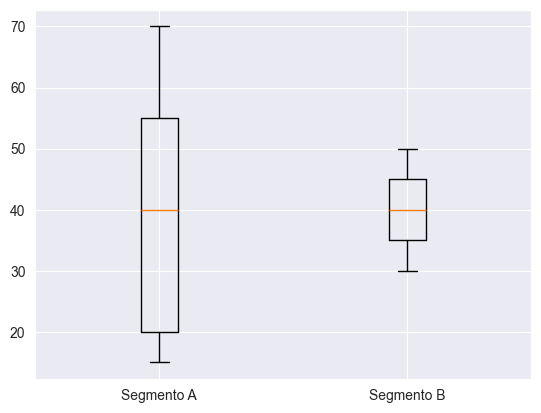

In [21]:
plt.boxplot([[15, 20, 40, 55, 70], [30, 35, 40, 45, 50]], labels=['Segmento A', 'Segmento B'])

### E que aconteceu com os outliers?

Exemplo 1: [ 3  3  4  7  7  8  8 11 11 11 12 15 19 22 23]
Exemplo 2: [ 3  3  4  7  7  8  8 11 11 11 12 15 19 22 50]

 Medida         | Exemplo 1 | Exemplo 2
----------------------------------------
- Média         | 10.9      | 12.7
- Mediana       | 11.0      | 11.0
- Moda          | 11        | 11
----------------------------------------
- Mínimo        | 3         | 3
- Máximo        | 23        | 50
- Amplitude     | 20        | 47
- IQR           | 6.5       | 6.5
- Variância     | 38.2      | 127.0
- Desvio Padrão | 6.2       | 11.3


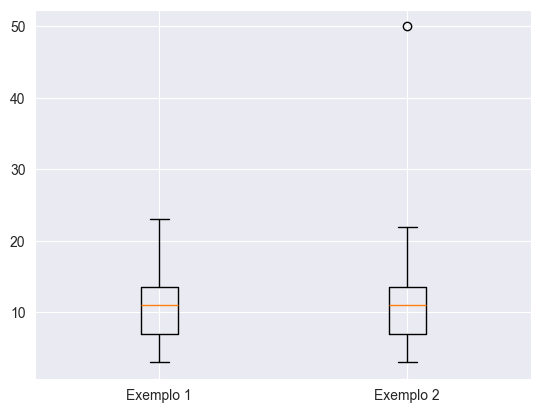

In [22]:
# Define um array de amostra
ex_1 = np.array([3, 3, 4, 7, 7, 8, 8, 11, 11, 11, 12, 15, 19, 22, 23])
ex_2 = np.array([3, 3, 4, 7, 7, 8, 8, 11, 11, 11, 12, 15, 19, 22, 50])
print(f'Exemplo 1: {ex_1}')
print(f'Exemplo 2: {ex_2}')

print(f"\n Medida         | Exemplo 1 | Exemplo 2")
print(f"----------------------------------------")
print(f"- Média         | {np.mean(ex_1):.1f}      | {np.mean(ex_2):.1f}")
print(f"- Mediana       | {np.median(ex_1)}      | {np.median(ex_2)}")
print(f"- Moda          | {stats.mode(ex_1)[0]}        | {stats.mode(ex_2)[0]}")
print(f"----------------------------------------")
print(f"- Mínimo        | {np.min(ex_1)}         | {np.min(ex_2)}")
print(f"- Máximo        | {np.max(ex_1)}        | {np.max(ex_2)}")
print(f"- Amplitude     | {np.max(ex_1) - np.min(ex_1)}        | {np.max(ex_2) - np.min(ex_2)}")
print(f"- IQR           | {np.quantile(ex_1, 0.75) - np.quantile(ex_1, 0.25)}       | {np.quantile(ex_2, 0.75) - np.quantile(ex_2, 0.25)}")
print(f"- Variância     | {np.var(ex_1):.1f}      | {np.var(ex_2):.1f}")
print(f"- Desvio Padrão | {np.std(ex_1):.1f}       | {np.std(ex_2):.1f}")

plt.boxplot([ex_1, ex_2], labels=['Exemplo 1', 'Exemplo 2'])
plt.show()

**Describe() - resumo dos dados**

In [23]:
dados.describe(include=['object'])

,id_cliente,sucesso,ocupacao,estado_civil,educacao_formal,produto_credito,produto_fin_imob,npl_90,tipo_contato,mes_contato,dia_semana_contato,sucesso_prev
count,120,120,120,120,120,120,120,120,120,120,120,120
unique,120,2,3,2,2,2,1,2,2,5,7,2
top,DNXO0711,nao,automotiva,solteiro,ensino_superior,sim,sim,nao,email,out,qua,nao_aplica
freq,1,91,92,92,119,92,120,119,87,53,52,90


In [24]:
dados.describe()

,idade,num_contatos,dias_ult_contato,num_prev_conato,saldo
count,120.000000,120.000000,120.0,120.0,120.000000
mean,104.500000,1.016667,999.0,0.0,13002.230000
std,34.785054,0.182574,0.0,0.0,1.968056
min,45.000000,1.000000,999.0,0.0,13000.420000
25%,74.750000,1.000000,999.0,0.0,13000.717500
50%,104.500000,1.000000,999.0,0.0,13001.015000
75%,134.250000,1.000000,999.0,0.0,13004.012500
max,164.000000,3.000000,999.0,0.0,13007.010000
